# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
# Code Here
from palmerpenguins import load_penguins
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [2]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Need to dummify species, island, and sex.

In [3]:
X = penguins.drop("bill_length_mm", axis = 1)
y = penguins["bill_length_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
## Preprocessing: One-hot-encode
## Model spec: linear regression

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_s", enc, ["species"]),
    ("dummify_i", enc, ["island"]),
    ("dummify_x", enc, ["sex"])]
)

my_pipeline = Pipeline(
    [("dummify_everything", ct), ("ols", lr)]
)

In [5]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [6]:
# Simple Linear Regression
X = penguins[["bill_length_mm"]]
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()

my_pipeline = Pipeline(
    [("ols", lr)]
)

In [7]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_testlm = X_test
X_testlm["pred"] = y_pred

In [16]:
# Quadratic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
ct = ColumnTransformer(
    [("Square", PolynomialFeatures(degree = (1, 2)), ["bill_length_mm"])]
)

my_pipeline = Pipeline(
    [("Square", ct), ("ols", lr)]
)

In [18]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_testqr = X_test
X_testqr["pred"] = y_pred

In [10]:
# Cubic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
ct = ColumnTransformer(
    [("Cube", PolynomialFeatures(degree = (1, 3)), ["bill_length_mm"])]
)

my_pipeline = Pipeline(
    [("Cube", ct), ("ols", lr)]
)

In [11]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_testcr = X_test
X_testcr["pred"] = y_pred

In [12]:
# Degree 10 Polynomial Model
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
ct = ColumnTransformer(
    [("10", PolynomialFeatures(degree = (1, 10)), ["bill_length_mm"])]
)

my_pipeline = Pipeline(
    [("10", ct), ("ols", lr)]
)

In [13]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test10r = X_test
X_test10r["pred"] = y_pred

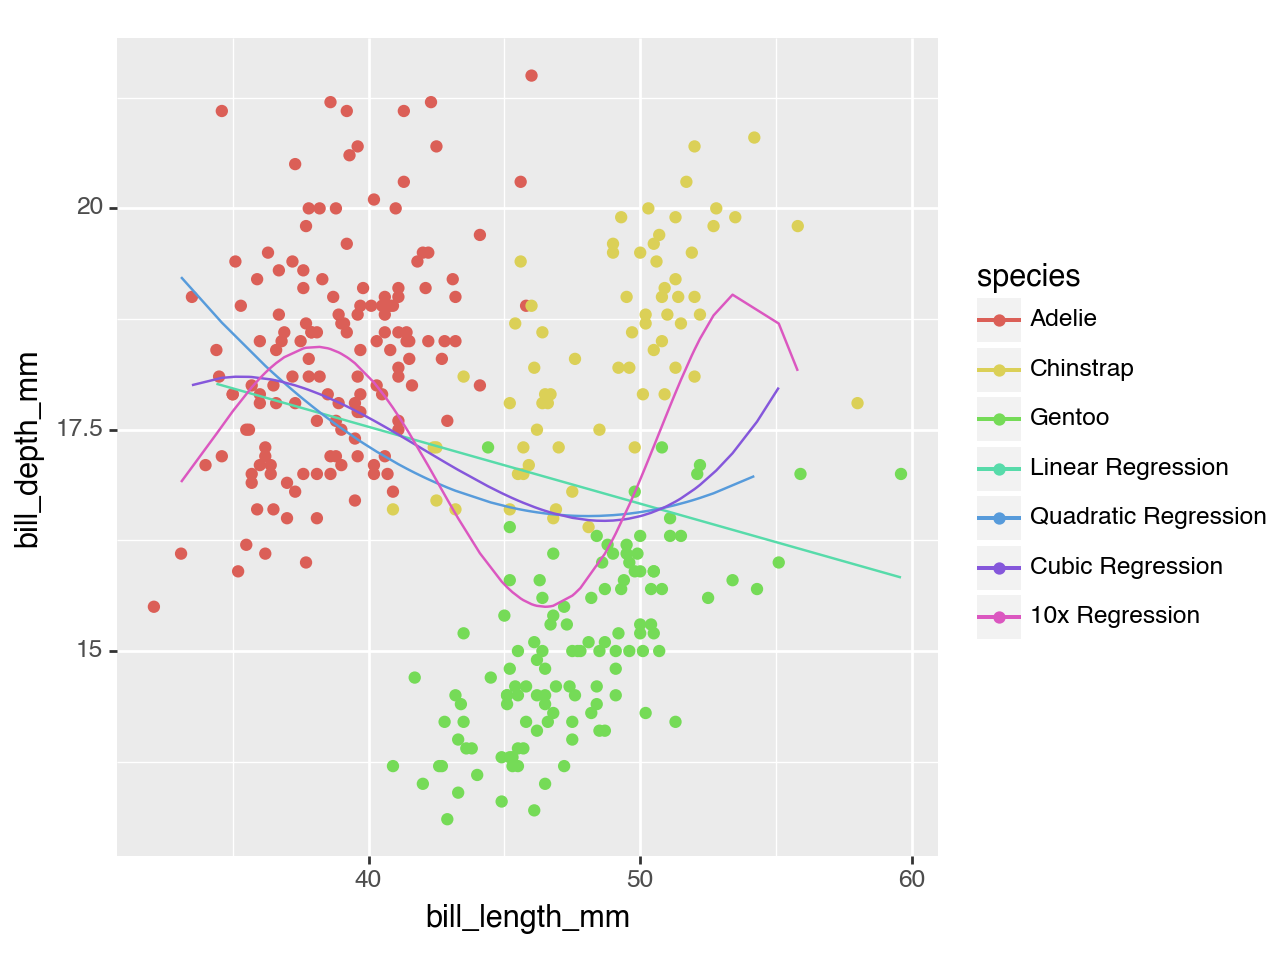

<Figure Size: (640 x 480)>

In [14]:
# Code Here
from plotnine import ggplot, aes, geom_point, geom_line, scale_color_manual
(ggplot(penguins, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) +
    geom_point() + 
    geom_line(X_testlm, aes(x = "bill_length_mm", y = "pred", color = '"Linear Regression"'), inherit_aes = False) + 
    geom_line(X_testqr, aes(x = "bill_length_mm", y = "pred", color = '"Quadratic Regression"'), inherit_aes = False) + 
    geom_line(X_testcr, aes(x = "bill_length_mm", y = "pred", color = '"Cubic Regression"'), inherit_aes = False) + 
    geom_line(X_test10r, aes(x = "bill_length_mm", y = "pred", color = '"10-degree Regression"'), inherit_aes = False) 
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear regression is underfitting the data, you can see that the regression line does not model the data points well.\
The 10-degree regression and the cubic regression appear to be overfitting the data, this can be seen in the behavior at the end of the graph where the two lines start to trend either towards zero or towards infinity.\
I think that the model that fits the data the best is the quadratic regression because it does not appear to be overfitting. 